In [ ]:
#@title Setup
!git clone https://github.com/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN
!pip install -r requirements.txt
# download model weights
!gdown https://drive.google.com/uc?id=1pG2S3sYvSaO0V0B8QPOl1RapPHpUGOaV -O weights/RealESRGAN_x2.pth
!gdown https://drive.google.com/uc?id=1SGHdZAln4en65_NQeQY9UjchtkEF9f5F -O weights/RealESRGAN_x4.pth
!gdown https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j -O weights/RealESRGAN_x8.pth
import os
from google.colab import files
import shutil
from realesrgan import RealESRGAN
from PIL import Image
import numpy as np
import torch
upload_folder = 'inputs'
result_folder = 'results'
os.makedirs(upload_folder, exist_ok=True)
os.makedirs(result_folder, exist_ok=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 13), reused 33 (delta 5), pack-reused 0
Unpacking objects: 100% (46/46), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1pG2S3sYvSaO0V0B8QPOl1RapPHpUGOaV
To: /content/Real-ESRGAN/weights/RealESRGAN_x2.pth
100% 67.1M/67.1M [00:00<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SGHdZAln4en65_NQeQY9UjchtkEF9f5F
To: /content/Real-ESRGAN/weights/RealESRGAN_x4.pth
100% 67.0M/67.0M [00:00<00:00, 206MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j
To: /content/Real-ESRGAN/weights/RealESRGAN_x8.pth
100% 67.2M/67.2M [00:00<00:00, 254MB/s]
device: cuda


**Model list: ** <br>
1. 'weights/RealESRGAN_x2.pth' <br>
2. 'weights/RealESRGAN_x4.pth' <br>
3. 'weights/RealESRGAN_x8.pth' <br>


In [ ]:
#@title Pick and load the model you want
choose = 3 #@param
def pick(choose):
  if choose == 1:
    return (2, "weights/RealESRGAN_x2.pth")
  elif choose == 2:
    return (4, "weights/RealESRGAN_x4.pth")
  elif choose == 3:
    return (8, "weights/RealESRGAN_x8.pth")
model = RealESRGAN(device, scale=pick(choose)[0])
model.load_weights(pick(choose)[1])

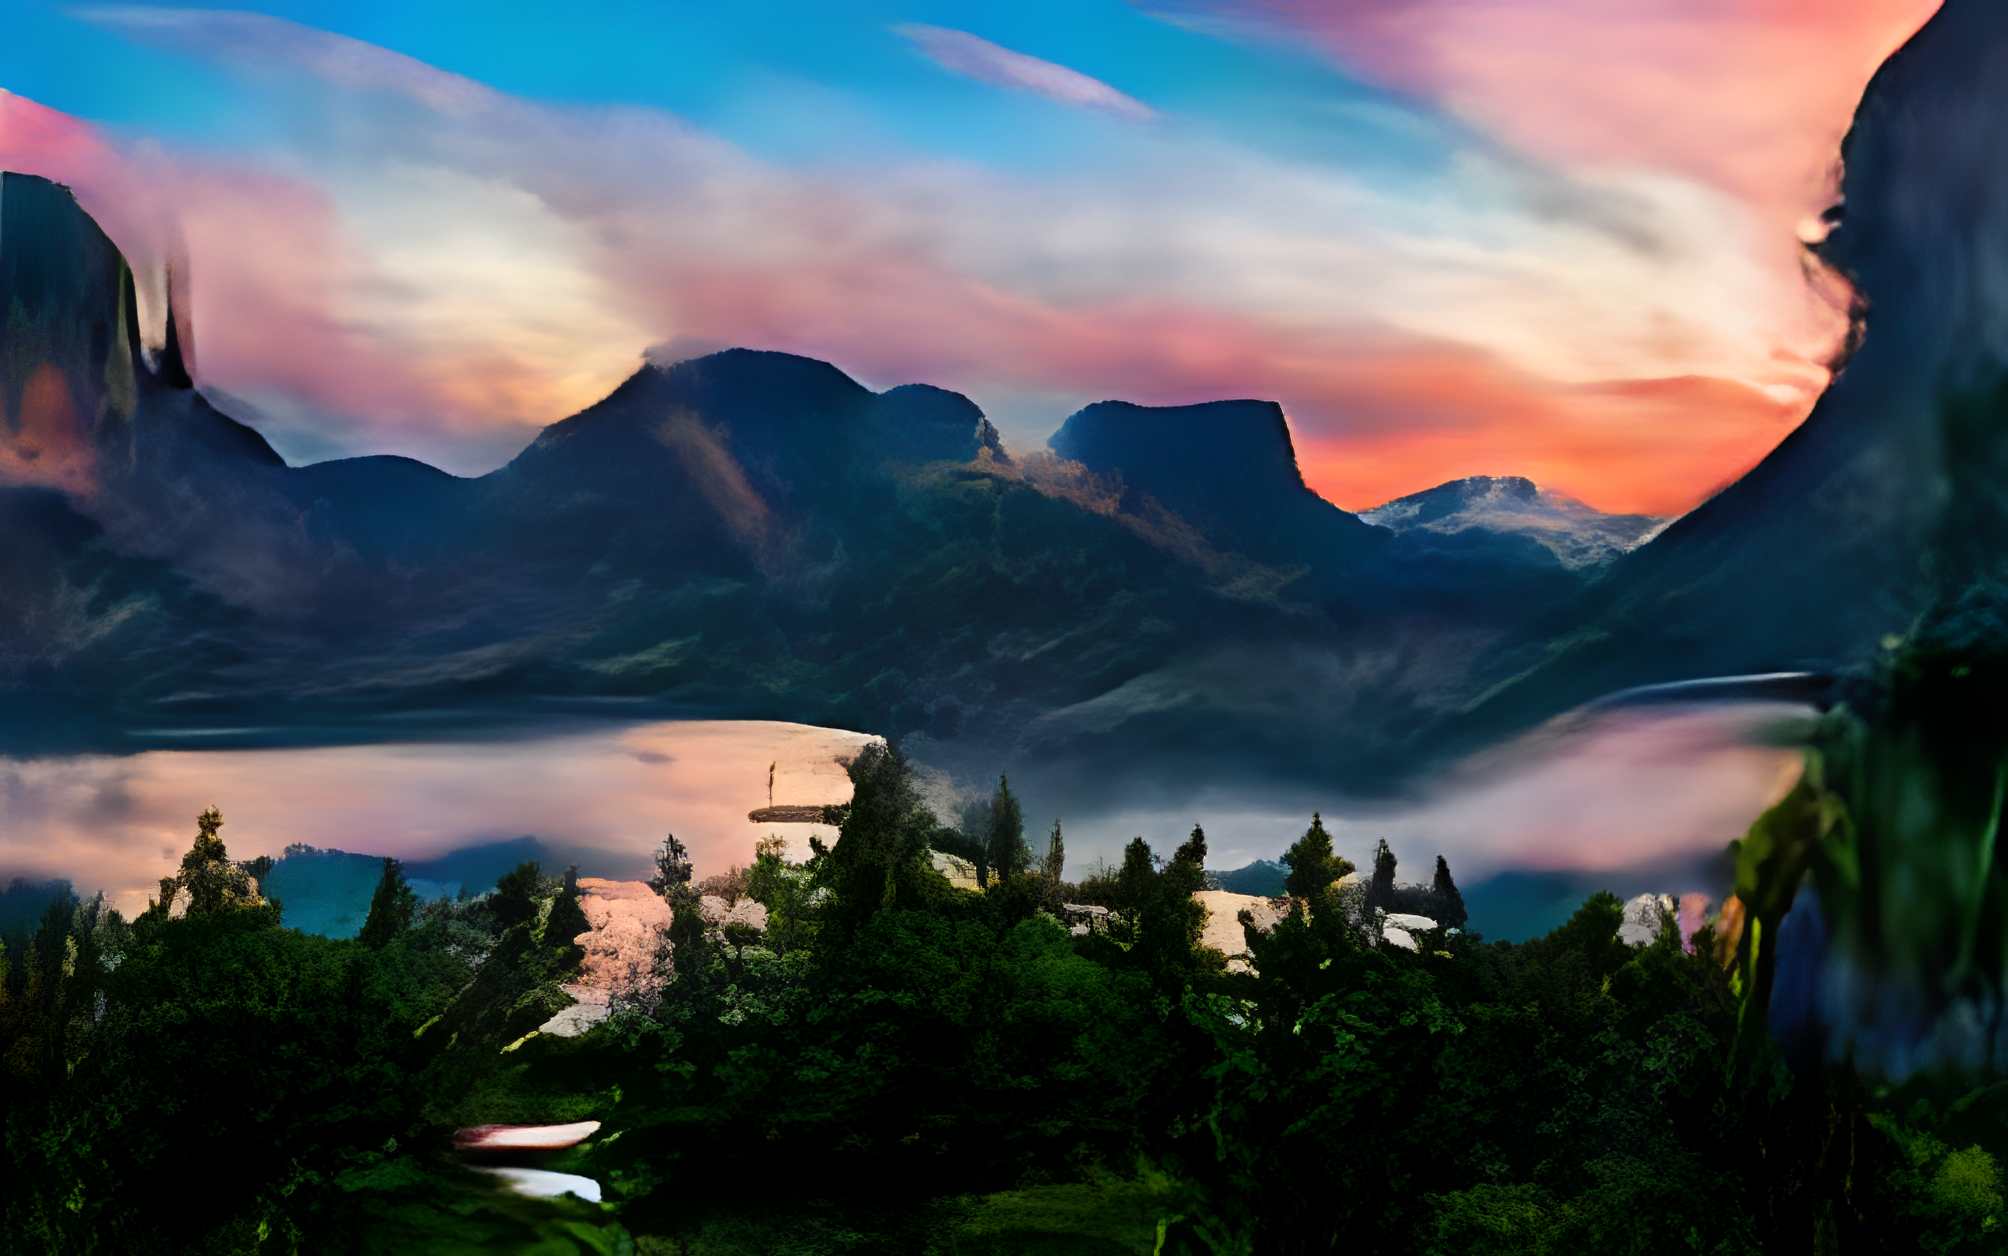

In [ ]:
#@title Set the input and result image path, then generate the result
path_to_image = 'inputs/test1.jpg' #@param {type:"string"}
result_image_path = 'results/test-1_x8.jpg' #@param {type:"string"}

image = Image.open(path_to_image).convert('RGB')
#input into the model
sr_image = model.predict(np.array(image))
#save the image
sr_image.save(result_image_path)
sr_image